In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0-dev20200315
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
pandas 1.0.3
sklearn 0.22.2.post1
tensorflow 2.2.0-dev20200315
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data( )
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
print(np.max(x_train), np.min(x_train))

255 0


In [4]:
# 归一化 x = (x- u) / std   (0,1)
from sklearn.preprocessing import StandardScaler
# x_train:[None, 28, 28] 三维的--> [None, 784] 
scaler = StandardScaler()
# fit_transform要求为二维矩阵，因此需要先转换
# 要进行除法，因此先转化为浮点型
# x_train是三维矩阵[None,28,28]，先将其转换为二维矩阵[None,784],再将其转回三维矩阵
# reshape（-1， 1）转化为一列(-1代表不确定几行)
# fit: 求得训练集的均值、方差、最大值、最小值等训练集固有的属性
# transform: 在fit的基础上，进行标准化，降维，归一化等操作
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [5]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [15]:
history= model.fit(x_train_scaled, y_train, epochs=10, 
                  validation_data = (x_valid_scaled, y_valid))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1700/1719 [============================>.] - ETA: 0s - loss: 0.5325 - accuracy: 0.8128WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002CD90A8B510> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and at

In [16]:
history.history

{'loss': [0.5315166711807251,
  0.38908541202545166,
  0.3515389561653137,
  0.3288816511631012,
  0.30808472633361816,
  0.29349812865257263,
  0.2793101966381073,
  0.2676607370376587,
  0.2571513056755066,
  0.24613060057163239],
 'accuracy': [0.8129818439483643,
  0.8600727319717407,
  0.8736909031867981,
  0.8810727000236511,
  0.8887454271316528,
  0.893745481967926,
  0.8979818224906921,
  0.9032727479934692,
  0.9071272611618042,
  0.9106909036636353],
 'val_loss': [0.40250855684280396,
  0.36585327982902527,
  0.3465822637081146,
  0.333186537027359,
  0.3324284255504608,
  0.3183203637599945,
  0.31208571791648865,
  0.3189849853515625,
  0.30256637930870056,
  0.3011835813522339],
 'val_accuracy': [0.8539999723434448,
  0.8704000115394592,
  0.8744000196456909,
  0.8790000081062317,
  0.8820000290870667,
  0.881600022315979,
  0.8845999836921692,
  0.8838000297546387,
  0.8884000182151794,
  0.8899999856948853]}

In [19]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.531517,0.812982,0.402509,0.8540
1,0.389085,0.860073,0.365853,0.8704
2,0.351539,0.873691,0.346582,0.8744
3,0.328882,0.881073,0.333187,0.8790
4,0.308085,0.888745,0.332428,0.8820
5,0.293498,0.893745,0.318320,0.8816
6,0.279310,0.897982,0.312086,0.8846
7,0.267661,0.903273,0.318985,0.8838
8,0.257151,0.907127,0.302566,0.8884
9,0.246131,0.910691,0.301184,0.8900


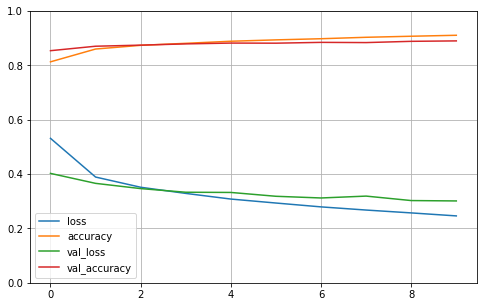

In [20]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1) # 显示坐标轴的范围
    plt.show()

plot_learning_curves(history)

In [21]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 908us/step - loss: 0.3279 - accuracy: 0.8815


[0.3279227018356323, 0.8815000057220459]